264
(264, 264)


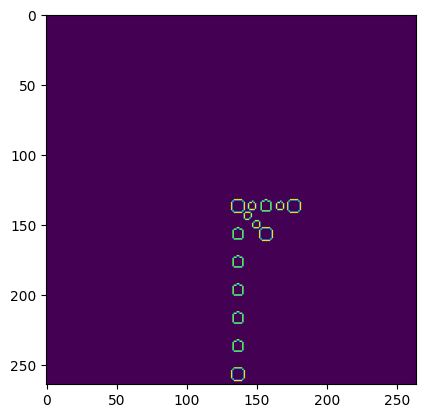

center_image1 [[136.5        136.5       ]
 [136.41666667 156.5       ]
 [136.5        176.5       ]
 [136.4375     146.5       ]
 [136.4375     166.5       ]
 [143.33333333 143.33333333]
 [149.66666667 149.66666667]
 [156.41666667 136.5       ]
 [156.5        156.5       ]
 [176.41666667 136.5       ]
 [196.41666667 136.5       ]
 [216.41666667 136.5       ]
 [236.41666667 136.5       ]
 [256.5        136.5       ]]
center_image2 [[136.5        136.5       ]
 [136.45833333 156.5       ]
 [136.5        176.5       ]
 [136.375      146.5       ]
 [136.375      166.5       ]
 [143.33333333 143.33333333]
 [146.375      136.5       ]
 [149.66666667 149.66666667]
 [156.46428571 156.5       ]
 [156.45833333 136.5       ]
 [166.375      136.5       ]
 [176.45833333 136.5       ]
 [186.375      136.5       ]
 [196.45833333 136.5       ]
 [206.375      136.5       ]
 [216.5        136.5       ]]


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

# Load the data
binary_image1 = np.load('CerclesI1.npy')
print(binary_image1.shape[0])
binary_image2 = np.load('CerclesI2.npy')
print(binary_image2.shape)
center_image1= np.load('CerclesC1.npy')
plt.imshow(binary_image1)
plt.show()
print("center_image1",center_image1)
center_image2= np.load('CerclesC2.npy')
print("center_image2",center_image2)

In [2]:
# Object points in 3D space
objp = np.array([
    [0, 0, 0],
    [0.7,0.7,0],
    [0, 1, 0],
    [1.31,1.31,0],   
    [0, 2, 0],
    [2,2,0],
    [0, 3, 0],
    [0, 4, 0],
    
    


], dtype=np.float32)
print(objp)
# Image points in 2D space for image 1
import numpy as np

# Assuming `center_image1` and `center_image2` are arrays or lists containing coordinates

# Image points in 2D space for image 1
imgpoints1 = np.array([
    [center_image1[0][0], center_image1[0][1]],
    [center_image1[5][0], center_image1[5][1]],
    [center_image1[3][0], center_image1[3][1]],
    [center_image1[6][0], center_image1[6][1]],
    [center_image1[1][0], center_image1[1][1]],
    [center_image1[8][0], center_image1[8][1]],
    [center_image1[4][0], center_image1[4][1]],
    [center_image1[2][0], center_image1[2][1]],
   
    

], dtype=np.float32)
imgpoints1 = np.reshape(imgpoints1, (-1,1,2))
# Image points in 2D space for image 2
imgpoints2 = np.array([
    [center_image2[0][0], center_image2[0][1]],
    [center_image2[5][0], center_image2[5][1]],
    [center_image2[3][0], center_image2[3][1]],
    [center_image2[7][0], center_image2[7][1]],
    [center_image2[1][0], center_image2[1][1]],
    [center_image2[8][0], center_image2[8][1]],
    
    [center_image2[4][0], center_image2[4][1]],
    [center_image2[2][0], center_image2[2][1]],
    

], dtype=np.float32)
imgpoints2 = np.reshape(imgpoints2, (-1,1,2))
print(imgpoints2)

[[0.   0.   0.  ]
 [0.7  0.7  0.  ]
 [0.   1.   0.  ]
 [1.31 1.31 0.  ]
 [0.   2.   0.  ]
 [2.   2.   0.  ]
 [0.   3.   0.  ]
 [0.   4.   0.  ]]
[[[136.5     136.5    ]]

 [[143.33333 143.33333]]

 [[136.375   146.5    ]]

 [[149.66667 149.66667]]

 [[136.45833 156.5    ]]

 [[156.46428 156.5    ]]

 [[136.375   166.5    ]]

 [[136.5     176.5    ]]]


In [3]:
img = cv.imread("CerclesC1.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

image_size = (binary_image1.shape[0], binary_image1.shape[1])
print(image_size)
# Here, you need to specify your initial guess for the intrinsic matrix
initial_intrinsic_matrix = np.array([[7.5, 0, len(gray)/2],
                                     [0, 7.5, len(gray)/2],
                                     [0, 0, 1]])
for imgp in [imgpoints1,imgpoints2]:
    objpoints.append(objp)
    imgpoints.append(imgp)

    ret,mtx,dist,rvecs,tvecs = cv.calibrateCamera(objpoints,imgpoints, gray.shape[::-1], initial_intrinsic_matrix,None,None, flags=cv.CALIB_USE_INTRINSIC_GUESS)

(264, 264)


In [5]:
print(rvecs)
print("rvecs1",rvecs[0])
print("rvecs2",rvecs[1])
##matrice de rotation => convertir le vecteur en matrice
print("(rvecs[0])[0] ",(rvecs[0])[0] )
rmatRight = cv.Rodrigues(rvecs[0])[0] 
print("rmatRight",rmatRight)
rmatLeft = cv.Rodrigues(rvecs[1])[0]  

print("tvecs[0]",tvecs[0])
print("tvecs[1]",tvecs[1])
#matrice complète [R|t] => ajouter t dans R
rotMatRight = np.concatenate((rmatRight,tvecs[0]), axis=1)
print("rotMatRight",rotMatRight)
rotMatLeft = np.concatenate((rmatLeft,tvecs[1]), axis=1)
print("rotMatLeft",rotMatLeft)

(array([[ 3.37097751e-05],
       [-1.23806283e-04],
       [-9.52385366e-04]]), array([[ 3.85115359e-05],
       [-1.00756419e-04],
       [-6.32689970e-04]]))
rvecs1 [[ 3.37097751e-05]
 [-1.23806283e-04]
 [-9.52385366e-04]]
rvecs2 [[ 3.85115359e-05]
 [-1.00756419e-04]
 [-6.32689970e-04]]
(rvecs[0])[0]  [3.37097751e-05]
rmatRight [[ 9.99999539e-01  9.52383133e-04 -1.23822316e-04]
 [-9.52387307e-04  9.99999546e-01 -3.36508143e-05]
 [ 1.23790211e-04  3.37687255e-05  9.99999992e-01]]
tvecs[0] [[-10.3431257 ]
 [-10.34005491]
 [  0.7489862 ]]
tvecs[1] [[-10.3444483 ]
 [-10.34053421]
 [  0.74901851]]
rotMatRight [[ 9.99999539e-01  9.52383133e-04 -1.23822316e-04 -1.03431257e+01]
 [-9.52387307e-04  9.99999546e-01 -3.36508143e-05 -1.03400549e+01]
 [ 1.23790211e-04  3.37687255e-05  9.99999992e-01  7.48986205e-01]]
rotMatLeft [[ 9.99999795e-01  6.32687986e-04 -1.00768595e-04 -1.03444483e+01]
 [-6.32691866e-04  9.99999799e-01 -3.84796594e-05 -1.03405342e+01]
 [ 1.00744230e-04  3.85434070e-05  9.9

In [6]:
#matrice de la camera @ RT
camLeft = mtx @ rotMatLeft
camRight = mtx @ rotMatRight

# trouver cx et cy (coo centre optique dans limage) pour les 2 cameras
camWorldCenterLeft = np.linalg.inv(np.concatenate((rotMatLeft,[[0,0,0,1]]), axis=0)) @ np.transpose([[0,0,0,1]])
print(camWorldCenterLeft)


camWorldCenterRight = np.linalg.inv(np.concatenate((rotMatRight,[[0,0,0,1]]), axis=0)) @ np.transpose([[0,0,0,1]])
print('Centre Gauche\n',camWorldCenterLeft) #1colonne à 4lignes
print('Centre right\n', camWorldCenterRight) #1colonne à 4lignes
def crossMat(v):
    v = v[:, 0]   # Matrice ligne afin d'accéder plus facilement aux valeurs v[1]...
    return np.array([[0, -v[2], v[1]],
                     [v[2], 0, -v[0]],
                     [-v[1], v[0], 0]])

def matFondamental(camLeft,centerRight,camRight):
        
        return np.array((crossMat(camLeft @ centerRight)) @ camLeft @ np.linalg.pinv(camRight))
    


[[10.33782835]
 [10.34704807]
 [-0.7504588 ]
 [ 1.        ]]
Centre Gauche
 [[10.33782835]
 [10.34704807]
 [-0.7504588 ]
 [ 1.        ]]
Centre right
 [[10.33318048]
 [10.34987554]
 [-0.75061486]
 [ 1.        ]]


In [7]:
def mark_circle_centers(binary_image, center_image):
    # Create a new image with the same dimensions as binary_image
    center_marked_image = np.zeros_like(binary_image)
    
    # Iterate through each center and mark it as 1
    for center in center_image:
        # Retrieve center coordinates
        center_x, center_y = int(center[1]), int(center[0])  # Convert to integers
        
        # Ensure the center coordinates are within the bounds of the image
        if 0 <= center_x < binary_image.shape[1] and 0 <= center_y < binary_image.shape[0]:
            # Mark the center as 1 in the new image
            center_marked_image[center_y, center_x] = 1
    
    return center_marked_image

Shape of center_marked_image1: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of center_marked_image2: (264, 264)


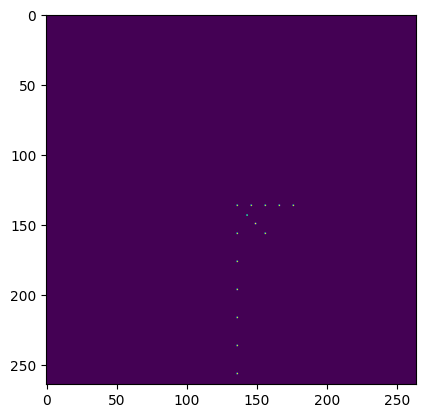

In [8]:
# Mark circle centers in both binary images
center_marked_image1 = mark_circle_centers(binary_image1, center_image1)
center_marked_image2 = mark_circle_centers(binary_image2, center_image2)

# Display the shape of the new images
print("Shape of center_marked_image1:", center_marked_image1)
print("Shape of center_marked_image2:", center_marked_image2.shape)

plt.imshow(center_marked_image1)
plt.show()

In [9]:

def find_coordinates_with_value(binary_image, center_image):
    # Initialize an empty list to store the coordinates of points with value 1
    points_coordinates = []
    
    # Iterate through each center and check if its value is 1 in the binary image
    for center in center_image:
        # Retrieve center coordinates
        center_x, center_y = int(center[1]), int(center[0])  # Convert to integers
        
        # Ensure the center coordinates are within the bounds of the image
        if 0 <= center_x < binary_image.shape[1] and 0 <= center_y < binary_image.shape[0]:
            # Check if the value at the center in the binary image is 1
            if binary_image[center_y, center_x] == 1:
                # If yes, append the coordinates to the list
                points_coordinates.append((center_x, center_y))  # Note the order (x, y) for coordinates
    
    return points_coordinates

coordinates_list = find_coordinates_with_value(center_marked_image2, center_image2)
print("Coordinates of points with value 1:", coordinates_list)

Coordinates of points with value 1: [(136, 136), (156, 136), (176, 136), (146, 136), (166, 136), (143, 143), (136, 146), (149, 149), (156, 156), (136, 156), (136, 166), (136, 176), (136, 186), (136, 196), (136, 206), (136, 216)]


In [10]:
listeleft=[]
for i in coordinates_list:
    print(i)
    liste=list(i)
    print(liste)
    liste.append(1)
    listeleft.append(liste)
    print(liste)
print("listeleft",listeleft)
print(len(listeleft))

(136, 136)
[136, 136]
[136, 136, 1]
(156, 136)
[156, 136]
[156, 136, 1]
(176, 136)
[176, 136]
[176, 136, 1]
(146, 136)
[146, 136]
[146, 136, 1]
(166, 136)
[166, 136]
[166, 136, 1]
(143, 143)
[143, 143]
[143, 143, 1]
(136, 146)
[136, 146]
[136, 146, 1]
(149, 149)
[149, 149]
[149, 149, 1]
(156, 156)
[156, 156]
[156, 156, 1]
(136, 156)
[136, 156]
[136, 156, 1]
(136, 166)
[136, 166]
[136, 166, 1]
(136, 176)
[136, 176]
[136, 176, 1]
(136, 186)
[136, 186]
[136, 186, 1]
(136, 196)
[136, 196]
[136, 196, 1]
(136, 206)
[136, 206]
[136, 206, 1]
(136, 216)
[136, 216]
[136, 216, 1]
listeleft [[136, 136, 1], [156, 136, 1], [176, 136, 1], [146, 136, 1], [166, 136, 1], [143, 143, 1], [136, 146, 1], [149, 149, 1], [156, 156, 1], [136, 156, 1], [136, 166, 1], [136, 176, 1], [136, 186, 1], [136, 196, 1], [136, 206, 1], [136, 216, 1]]
16


In [11]:
def getEpiLines(F, points):
    return F @ points
Fondamental = matFondamental(camRight,camWorldCenterLeft,camLeft)
listepipolar=[]
tempEpilines = []

for point in listeleft:
    # Convertir la liste en un vecteur colonne (numpy array)
    point_vector = np.array(point).reshape(3, 1)
    print("point_vector",point_vector)
    epipolar_line = getEpiLines(Fondamental, point_vector)
    print(epipolar_line)
    tempEpilines.append(point_vector)
    tempEpilines.append(epipolar_line)
    listepipolar.append(tempEpilines)
  
print(listepipolar)
print(len(listepipolar))
   
    

point_vector [[136]
 [136]
 [  1]]
[[-4.95942735e-03]
 [-5.11147113e-02]
 [ 7.62614263e+00]]
point_vector [[156]
 [136]
 [  1]]
[[-4.95973159e-03]
 [-4.79861504e-02]
 [ 7.29992309e+00]]
point_vector [[176]
 [136]
 [  1]]
[[-4.96003582e-03]
 [-4.48575895e-02]
 [ 6.97370355e+00]]
point_vector [[146]
 [136]
 [  1]]
[[-4.95957947e-03]
 [-4.95504309e-02]
 [ 7.46303286e+00]]
point_vector [[166]
 [136]
 [  1]]
[[-4.95988370e-03]
 [-4.64218700e-02]
 [ 7.13681332e+00]]
point_vector [[143]
 [143]
 [  1]]
[[-6.05518447e-03]
 [-5.00192090e-02]
 [ 8.01871856e+00]]
point_vector [[136]
 [146]
 [  1]]
[[-6.52464255e-03]
 [-5.11139884e-02]
 [ 8.35007516e+00]]
point_vector [[149]
 [149]
 [  1]]
[[-6.99440487e-03]
 [-4.90802069e-02]
 [ 8.35521222e+00]]
point_vector [[156]
 [156]
 [  1]]
[[-8.09016199e-03]
 [-4.79847046e-02]
 [ 8.74778815e+00]]
point_vector [[136]
 [156]
 [  1]]
[[-8.08985776e-03]
 [-5.11132655e-02]
 [ 9.07400769e+00]]
point_vector [[136]
 [166]
 [  1]]
[[-9.65507296e-03]
 [-5.11125426e-0

[array([[136],
       [136],
       [  1]]), array([[-4.95942735e-03],
       [-5.11147113e-02],
       [ 7.62614263e+00]]), array([[156],
       [136],
       [  1]]), array([[-4.95973159e-03],
       [-4.79861504e-02],
       [ 7.29992309e+00]]), array([[176],
       [136],
       [  1]]), array([[-4.96003582e-03],
       [-4.48575895e-02],
       [ 6.97370355e+00]]), array([[146],
       [136],
       [  1]]), array([[-4.95957947e-03],
       [-4.95504309e-02],
       [ 7.46303286e+00]]), array([[166],
       [136],
       [  1]]), array([[-4.95988370e-03],
       [-4.64218700e-02],
       [ 7.13681332e+00]]), array([[143],
       [143],
       [  1]]), array([[-6.05518447e-03],
       [-5.00192090e-02],
       [ 8.01871856e+00]]), array([[136],
       [146],
       [  1]]), array([[-6.52464255e-03],
       [-5.11139884e-02],
       [ 8.35007516e+00]]), array([[149],
       [149],
       [  1]]), array([[-6.99440487e-03],
       [-4.90802069e-02],
       [ 8.35521222e+00]])]
arrayep

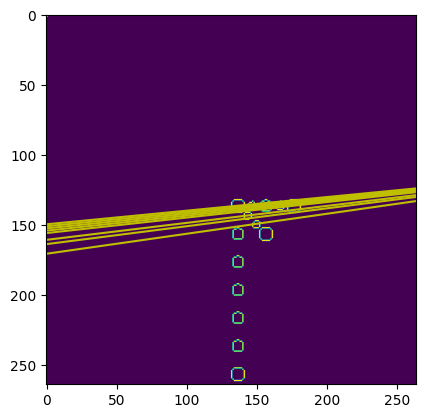

In [12]:
# Initialiser une liste pour stocker les lignes épipolaires
epipolar_lines_only = []

# Boucle à travers les paires de lignes consécutives
for i in range(len(listepipolar)):
    epipolar_lines_only.append(listepipolar[0][i])
print(epipolar_lines_only)

arrayepipolar_lines_only = np.array(epipolar_lines_only)
print("arrayepipolar_lines_only",arrayepipolar_lines_only)
coef , length =arrayepipolar_lines_only.shape[1],arrayepipolar_lines_only.shape[0]
print("length",length)
print(coef,length)
def lineY(coefs,x):
    a,b,c = coefs
    return-(c+a*x)/b
for i in range(length):
    plt.plot([0, 264], [lineY(arrayepipolar_lines_only[i], 0), lineY(arrayepipolar_lines_only[i], 264)], 'y')

plt.imshow(binary_image1)
plt.show()



In [13]:
def is_interesting(pixel_value):
    # Retourne True si le pixel est considéré comme intéressant, False sinon
    return pixel_value == 1

# Initialisation de la liste pour stocker les points d'intérêt
interest_points = []

# Parcours des lignes épipolaires
for i in range(length):
    # Parcours des colonnes de l'image
    for x in range(binary_image1.shape[1]):
        # Calcul de la coordonnée y sur la ligne épipolaire correspondant à la colonne x
        y = int(lineY(arrayepipolar_lines_only[i], x))
        
        # Vérification si les coordonnées sont valides et si le pixel est un point d'intérêt
        if 0 <= y < binary_image1.shape[0] and is_interesting(center_marked_image1[y, x]):
            # Enregistrement des coordonnées du point d'intérêt
            interest_points.append((x, y))
print(interest_points)
# Maintenant, la liste interest_points contient les coordonnées des points d'intérêt trouvés sur binary_image1 à partir des lignes épipolaires.


[(136, 136), (156, 136), (176, 136), (146, 136), (166, 136), (143, 143), (149, 149)]


C:\Users\souso\AppData\Local\Temp\ipykernel_17448\2383384974.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = int(lineY(arrayepipolar_lines_only[i], x))


In [14]:
listeright=[]
for i in interest_points:
    print(i)
    liste=list(i)
    print(liste)
    liste.append(1)
    listeright.append(liste)
    print(liste)
print("listeleft",listeright)
print(len(listeright))

(136, 136)
[136, 136]
[136, 136, 1]
(156, 136)
[156, 136]
[156, 136, 1]
(176, 136)
[176, 136]
[176, 136, 1]
(146, 136)
[146, 136]
[146, 136, 1]
(166, 136)
[166, 136]
[166, 136, 1]
(143, 143)
[143, 143]
[143, 143, 1]
(149, 149)
[149, 149]
[149, 149, 1]
listeleft [[136, 136, 1], [156, 136, 1], [176, 136, 1], [146, 136, 1], [166, 136, 1], [143, 143, 1], [149, 149, 1]]
7


[[136, 136, 1], [156, 136, 1], [176, 136, 1], [146, 136, 1], [166, 136, 1], [143, 143, 1], [136, 146, 1], [149, 149, 1], [156, 156, 1], [136, 156, 1], [136, 166, 1], [136, 176, 1], [136, 186, 1], [136, 196, 1], [136, 206, 1], [136, 216, 1]]
listlineleft [[[136, 136, 1], array([[10.33782835],
       [10.34704807],
       [-0.7504588 ],
       [ 1.        ]])], [[156, 136, 1], array([[10.33782835],
       [10.34704807],
       [-0.7504588 ],
       [ 1.        ]])], [[176, 136, 1], array([[10.33782835],
       [10.34704807],
       [-0.7504588 ],
       [ 1.        ]])], [[146, 136, 1], array([[10.33782835],
       [10.34704807],
       [-0.7504588 ],
       [ 1.        ]])], [[166, 136, 1], array([[10.33782835],
       [10.34704807],
       [-0.7504588 ],
       [ 1.        ]])], [[143, 143, 1], array([[10.33782835],
       [10.34704807],
       [-0.7504588 ],
       [ 1.        ]])], [[136, 146, 1], array([[10.33782835],
       [10.34704807],
       [-0.7504588 ],
       [ 1.        ]]

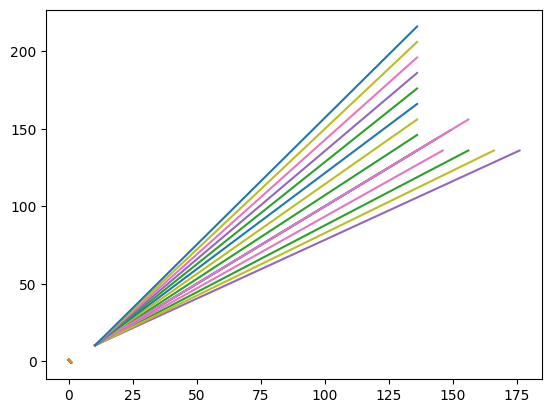

In [15]:
print(listeleft)

listlineleft=[]
# Coefficients de la ligne pour le centre de la caméra
coefficients_centre = np.array([[10.33782835], [10.34704807], [-0.7504588], [1]])
for point in (listeleft):
    
    plt.plot([point[0], coefficients_centre[0][0]], [point[1], coefficients_centre[1][0]], [point[2], coefficients_centre[2][0]])
    listlineleft.append([point, coefficients_centre])
print("listlineleft",listlineleft)
# Affichage de toutes les lignes dans le même graphe
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

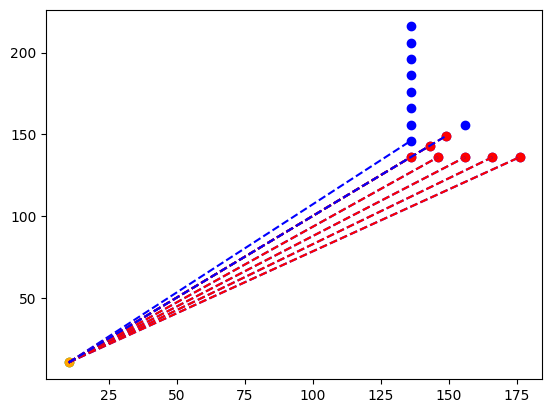

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Coordonnées des centres de caméra gauche et droite
centre_gauche = np.array([[10.33782835], [10.34704807], [-0.7504588]])
centre_droit = np.array([[10.33318048], [10.34987554], [-0.75061486]])

# Liste des points de l'image gauche et droite
liste_left = np.array([[136, 136, 1], [156, 136, 1], [176, 136, 1], [146, 136, 1], [166, 136, 1], [143, 143, 1],
                       [136, 146, 1], [149, 149, 1], [156, 156, 1], [136, 156, 1], [136, 166, 1], [136, 176, 1],
                       [136, 186, 1], [136, 196, 1], [136, 206, 1], [136, 216, 1]])

liste_right = np.array(listeright)

# Tracer les triangles
plt.scatter(liste_left[:, 0], liste_left[:, 1], color='blue', label='Points Image Gauche')
plt.scatter(liste_right[:, 0], liste_right[:, 1], color='red', label='Points Image Droite')
plt.scatter(centre_gauche[0], centre_gauche[1], color='green', label='Centre Caméra Gauche')
plt.scatter(centre_droit[0], centre_droit[1], color='orange', label='Centre Caméra Droite')

# Relier les points des triangles
for i in range(len(liste_left)):
    plt.plot([centre_gauche[0, 0], liste_left[i, 0]], [centre_gauche[1, 0], liste_left[i, 1]], color='blue', linestyle='--')
    plt.plot([centre_droit[0, 0], liste_right[i, 0]], [centre_droit[1, 0], liste_right[i, 1]], color='red', linestyle='--')

# Afficher les légendes
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Tracé des triangles')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
